## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[128, 64, 32]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, unit in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=unit, 
                                   activation="relu", 
                                  name="hidden_layer" + str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=unit, 
                                   activation="relu", 
                                  name="hidden_layer" + str(i+1))(x)
            x = BatchNormalization()(x)
    
    output_layer = keras.layers.Dense(units=output_units,
                                     activation="softmax",
                                     name="output_layer")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 128
MOMENTUM = 0.95
EARLYSTOPS = [5 , 10 , 25]

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
# 參考資料：https://keras.io/zh/callbacks/
from keras.callbacks import EarlyStopping

results = {}
for es in EARLYSTOPS:
    keras.backend.clear_session() # 把舊的 Graph 清掉    
    print("")
    print("#"*40)
    print("Experiment with Early_Stop = %d" %(es))
    print("#"*40)
    
    earlystop = EarlyStopping(monitor="val_accuracy",
                             patience=es,
                             verbose=1)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-EarlyStopPatience-%d" %(es)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


########################################
Experiment with Early_Stop = 5
########################################
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                2080      
___________

Epoch 10/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.3112 - accuracy: 0.5355 - val_loss: 1.4981 - val_accuracy: 0.4704
Epoch 11/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.2880 - accuracy: 0.5442 - val_loss: 1.5207 - val_accuracy: 0.4599
Epoch 12/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.2685 - accuracy: 0.5504 - val_loss: 1.5199 - val_accuracy: 0.4628
Epoch 13/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.2486 - accuracy: 0.5580 - val_loss: 1.5560 - val_accuracy: 0.4557
Epoch 14/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.2304 - accuracy: 0.5636 - val_loss: 1.5369 - val_accuracy: 0.4602
Epoch 15/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.2163 - accuracy: 0.5681 - val_loss: 1.5243 - val_accuracy: 0.4640
Epoch 16/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.1985 - accuracy: 0.5753

50000/50000 [==============================] - 6s 120us/step - loss: 1.1089 - accuracy: 0.6065 - val_loss: 1.6693 - val_accuracy: 0.4498
Epoch 25/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.1034 - accuracy: 0.6087 - val_loss: 1.5574 - val_accuracy: 0.4726
Epoch 26/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.0878 - accuracy: 0.6146 - val_loss: 1.6127 - val_accuracy: 0.4666
Epoch 27/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.0799 - accuracy: 0.6171 - val_loss: 1.6225 - val_accuracy: 0.4544
Epoch 28/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.0712 - accuracy: 0.6190 - val_loss: 1.6535 - val_accuracy: 0.4579
Epoch 29/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.0564 - accuracy: 0.6254 - val_loss: 1.6605 - val_accuracy: 0.4501
Epoch 30/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.0495 - accuracy: 0.6272 - val_loss:

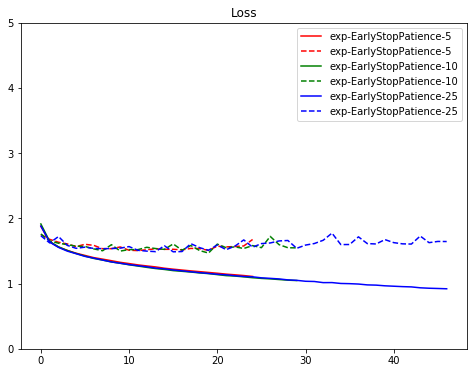

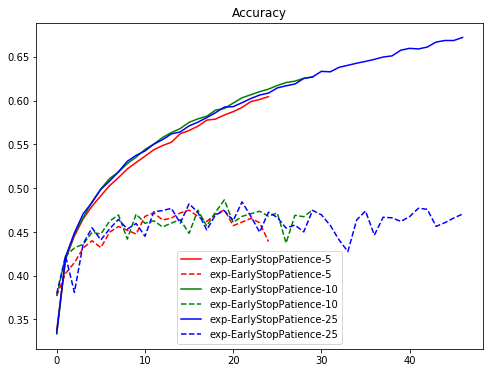

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "c", "xkcd:pale violet", "tab:orange","k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# 心得：
### EARLYSTOPS = [5 , 10 , 25]
停下的epoch分別為25/50、30/50、47/50，這說明了early stop中的patience設定越大，對於要提早暫停的忍受度越高。